In [0]:
!nvidia-smi

Sat Nov 30 06:25:43 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [0]:
!wget https://raw.githubusercontent.com/huseinzol05/Self-Driving-Car-Engines/master/18.lane-augmentation-offroad/img_1960.jpg


--2019-11-30 06:26:33--  https://raw.githubusercontent.com/huseinzol05/Self-Driving-Car-Engines/master/18.lane-augmentation-offroad/img_1960.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 306272 (299K) [image/jpeg]
Saving to: ‘img_1960.jpg’

img_1960.jpg        100%[===================>] 299.09K  --.-KB/s    in 0.05s   

2019-11-30 06:26:33 (5.72 MB/s) - ‘img_1960.jpg’ saved [306272/306272]



In [0]:
!wget http://download.tensorflow.org/models/deeplab_cityscapes_xception71_trainfine_2018_09_08.tar.gz

--2019-11-30 06:27:41--  http://download.tensorflow.org/models/deeplab_cityscapes_xception71_trainfine_2018_09_08.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.23.128, 2404:6800:4008:c02::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.23.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 466564717 (445M) [application/x-tar]
Saving to: ‘deeplab_cityscapes_xception71_trainfine_2018_09_08.tar.gz’

deeplab_cityscapes_ 100%[===================>] 444.95M  83.7MB/s    in 5.8s    

2019-11-30 06:27:47 (76.8 MB/s) - ‘deeplab_cityscapes_xception71_trainfine_2018_09_08.tar.gz’ saved [466564717/466564717]



In [0]:
!tar -zxf deeplab_cityscapes_xception71_trainfine_2018_09_08.tar.gz

In [0]:
# !ls -al

In [0]:
# !ls train_fine/* -al

In [0]:
import os

INPUT_TENSOR_NAME = 'ImageTensor:0'
OUTPUT_TENSOR_NAME = 'SemanticPredictions:0'
INPUT_SIZE = 513
FROZEN_GRAPH_NAME = 'frozen_inference_graph'
MODEL_NAME = 'train_fine'
PATH_TO_CKPT = os.path.join(MODEL_NAME, 'frozen_inference_graph.pb')

detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        sess = tf.InteractiveSession()
        sess.run(tf.global_variables_initializer())


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


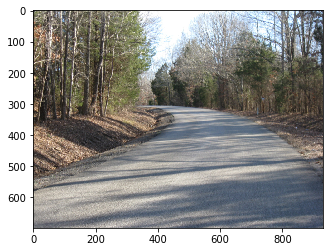

In [0]:
from skimage import io
import matplotlib.pyplot as plt
import cv2

img = io.imread('img_1960.jpg')
plt.imshow(img)


In [0]:
resized_img = cv2.resize(img, (INPUT_SIZE, INPUT_SIZE))
resized_img.shape


(513, 513, 3)

In [0]:
%%time

segmentation = sess.run(OUTPUT_TENSOR_NAME, 
         feed_dict = {INPUT_TENSOR_NAME: [resized_img]})[0]


CPU times: user 83.6 ms, sys: 45.1 ms, total: 129 ms
Wall time: 994 ms


In [0]:
segmentation.shape

(513, 513)

In [0]:
segmentation

array([[8, 8, 8, ..., 8, 8, 8],
       [8, 8, 8, ..., 8, 8, 8],
       [8, 8, 8, ..., 8, 8, 8],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
import numpy as np

colormap = np.zeros((256, 3), dtype=np.uint8)
colormap[0] = [128, 64, 128]
colormap[1] = [244, 35, 232]
colormap[2] = [70, 70, 70]
colormap[3] = [102, 102, 156]
colormap[4] = [190, 153, 153]
colormap[5] = [153, 153, 153]
colormap[6] = [250, 170, 30]
colormap[7] = [220, 220, 0]
colormap[8] = [107, 142, 35]
colormap[9] = [152, 251, 152]
colormap[10] = [70, 130, 180]
colormap[11] = [220, 20, 60]
colormap[12] = [255, 0, 0]
colormap[13] = [0, 0, 142]
colormap[14] = [0, 0, 70]
colormap[15] = [0, 60, 100]
colormap[16] = [0, 80, 100]
colormap[17] = [0, 0, 230]
colormap[18] = [119, 11, 32]

cityscapes_labels = [
      'road',
      'sidewalk',
      'building',
      'wall',
      'fence',
      'pole',
      'traffic light',
      'traffic sign',
      'vegetation',
      'terrain',
      'sky',
      'person',
      'rider',
      'car',
      'truck',
      'bus',
      'train',
      'motorcycle',
      'bicycle',
]



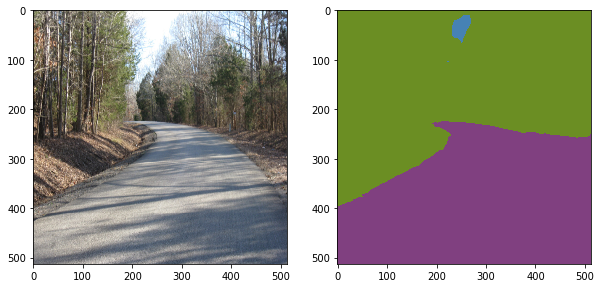

In [0]:
segmentation_color = colormap[segmentation]

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.imshow(resized_img)
plt.subplot(1, 2, 2)
plt.imshow(segmentation_color)


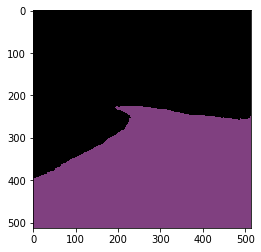

In [0]:
mask = cv2.inRange(segmentation_color, tuple([128, 64, 128]),
            tuple([128, 64, 128]))

masked_img = cv2.bitwise_and(segmentation_color, 
                             segmentation_color,
                             mask = mask)

plt.imshow(masked_img)


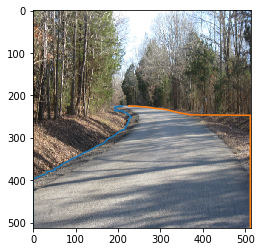

In [0]:
y, x, _ = np.where(masked_img > 50)

left, right = [], []

for y_ in np.unique(y):
  r = x[y == y_]
  left.append(r.min())
  right.append(r.max())

plt.imshow(resized_img)
plt.plot(left, np.unique(y))
plt.plot(right, np.unique(y))


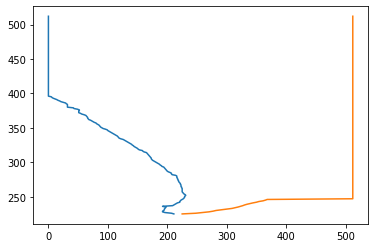

In [0]:
plt.plot(left, np.unique(y))
plt.plot(right, np.unique(y))


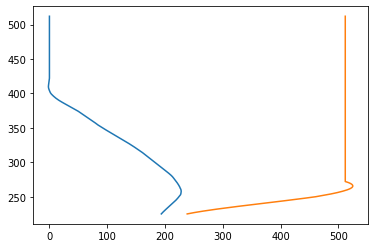

In [0]:
 from scipy.signal import savgol_filter

left_filtered = savgol_filter(left, 51, 3)
right_filtered = savgol_filter(right, 51, 3)

plt.plot(left_filtered, np.unique(y))
plt.plot(right_filtered, np.unique(y))

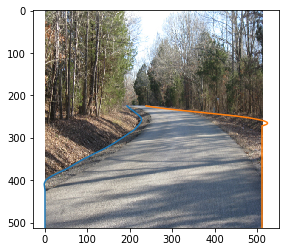

In [0]:
plt.imshow(resized_img)
plt.plot(left_filtered, np.unique(y))
plt.plot(right_filtered, np.unique(y))

In [0]:
%%time

left_filtered = savgol_filter(left, 51, 3)
right_filtered = savgol_filter(right, 51, 3)

CPU times: user 4.39 ms, sys: 590 µs, total: 4.98 ms
Wall time: 7.36 ms
